<a href="https://colab.research.google.com/github/pjcroxas/Talent-Retention-in-Railway-Workforce/blob/main/Comprehensive_Data_Analysis_Railway_Workforce_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, math
import matplotlib.ticker as mtick
from matplotlib import style

In [2]:
dir = "/content/drive/My Drive/Data Science Portfolio/2024/Talent Retention"

In [3]:
dir = "/content/drive/My Drive/Data Science Portfolio/2024/Talent Retention"
retention_df = pd.read_excel(dir+"/talent-retention-dataset.xlsx")
retention_df.head()

,Age,Sex,HighestEducationalAttainment,YearsofService,Occupation,Organization,NatureofEmployment,JF1,JF2,JL1,...,RM11,ITL1,ITS1,ITS2,ITS3,ITS4,ITL2,ITS5,ITS6,ITL3
0,36-40,Male,Bachelor's Degree,11-15 Years,Government Employee,Light Rail Transit Authority (LRTA),Permanent,3,4,2,...,3,3,3,3,3,3,3,3,3,3
1,46-50,Male,Bachelor's Degree,16-20 Years,Tranport operations Supervisor B,Light Rail Transit Authority (LRTA),Contractual,4,5,5,...,2,3,4,4,4,3,3,5,5,3
2,36-40,Male,Bachelor's Degree,11-15 Years,Transport Operations Supervisor B,Light Rail Transit Authority (LRTA),Contractual,4,5,3,...,4,4,5,5,5,3,3,5,5,4
3,46-50,Male,Bachelor's Degree,16-20 Years,Transport Operations Supervisor B,Light Rail Transit Authority (LRTA),Contractual,5,4,5,...,5,3,4,3,4,3,3,5,5,3
4,26-30,Male,Bachelor's Degree,6-10 Years,Train Driver A,Light Rail Transit Authority (LRTA),Contractual,5,5,4,...,5,3,5,5,5,5,3,5,5,3


**Job Embeddedness**

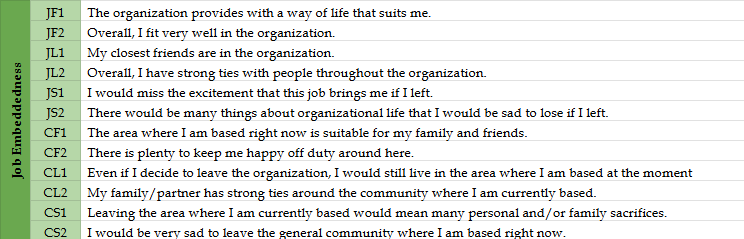

**Talent Management**

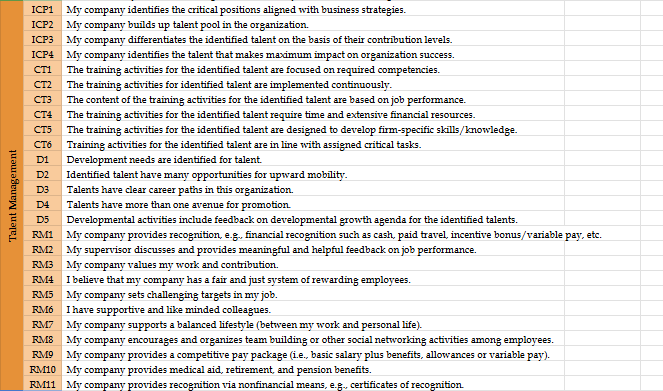

**Employee Retention**

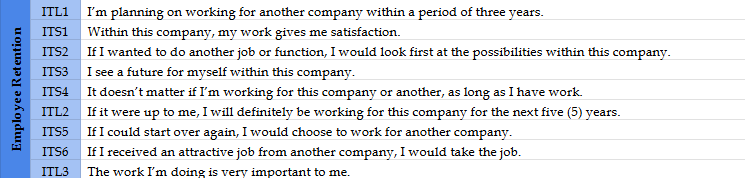

## Univariate Analysis

In [4]:
retention_df.columns

Index(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment', 'JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3'],
      dtype='object')

In [5]:
style.use("bmh")
def plot_univariate(feature, plot_type, angle, data=retention_df):
  count = data[feature].value_counts().sort_values()

  if plot_type == "pie":
    ax = count.plot(kind=plot_type, autopct='%1.1f%%', startangle=90, ylabel="", figsize=(6,6))

  else:
    ax = count.plot(kind=plot_type)
    xlabels = ax.get_xticklabels()
    sum = data[feature].value_counts().sum()
    for i, v in enumerate(count):
      ax.text(i, v, f"{v}\n({v/sum:.1%})", ha="center", fontsize=10)  # 1% format
      ax.set_xticklabels(xlabels, rotation=angle, ha='right', rotation_mode='anchor')

Text(0.5, 0, 'Age Range')

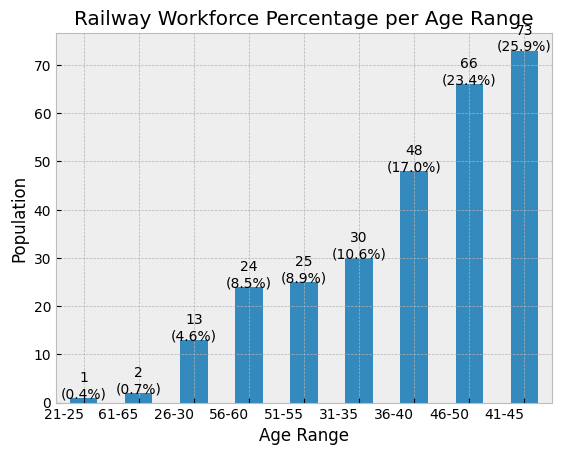

In [6]:
plot_univariate("Age", "bar", 0)
plt.title("Railway Workforce Percentage per Age Range")
plt.ylabel("Population")
plt.xlabel("Age Range")

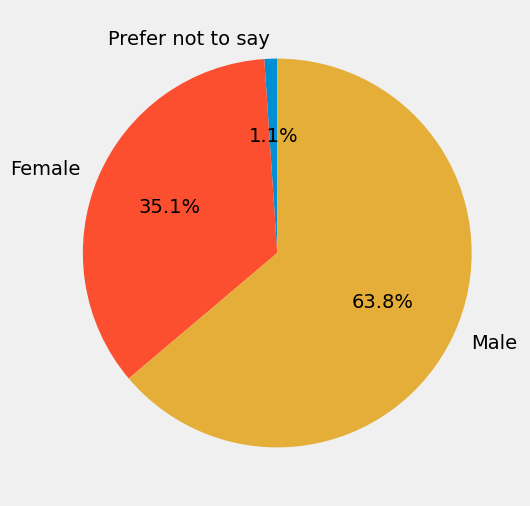

In [7]:
style.use("fivethirtyeight")
plot_univariate("Sex", "pie", 0)

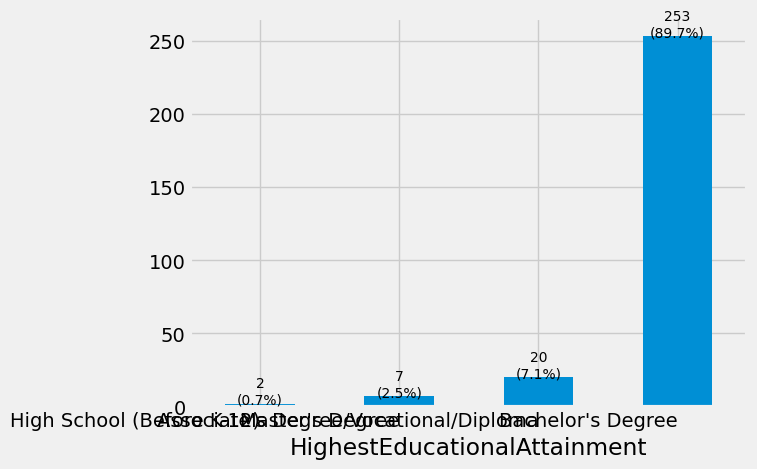

In [8]:
plot_univariate("HighestEducationalAttainment", "bar", 0)

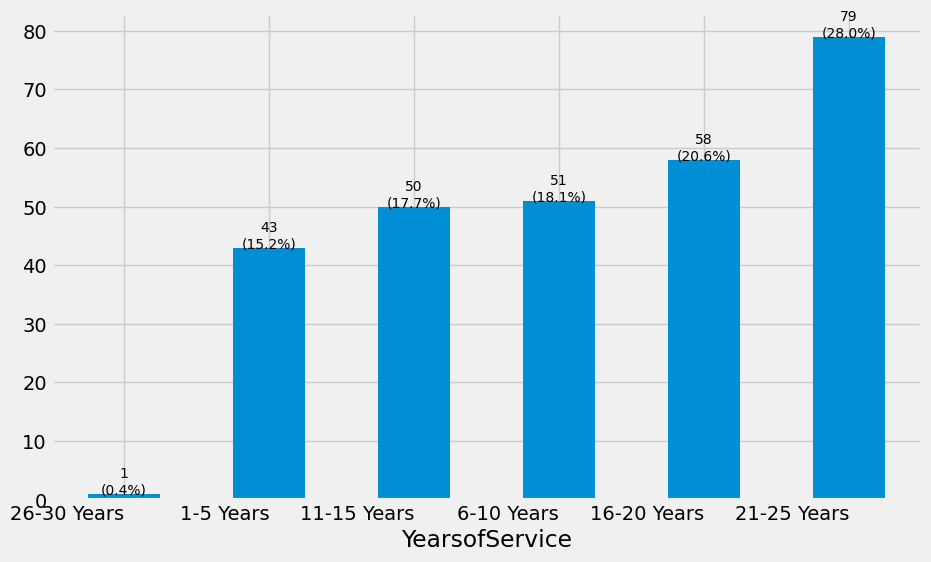

In [9]:
# retention_df["YearsofService"].value_counts().sum()
plt.figure(figsize=(10,6))
plot_univariate("YearsofService", "bar", 0)

In [10]:
retention_df.columns

Index(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment', 'JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3'],
      dtype='object')

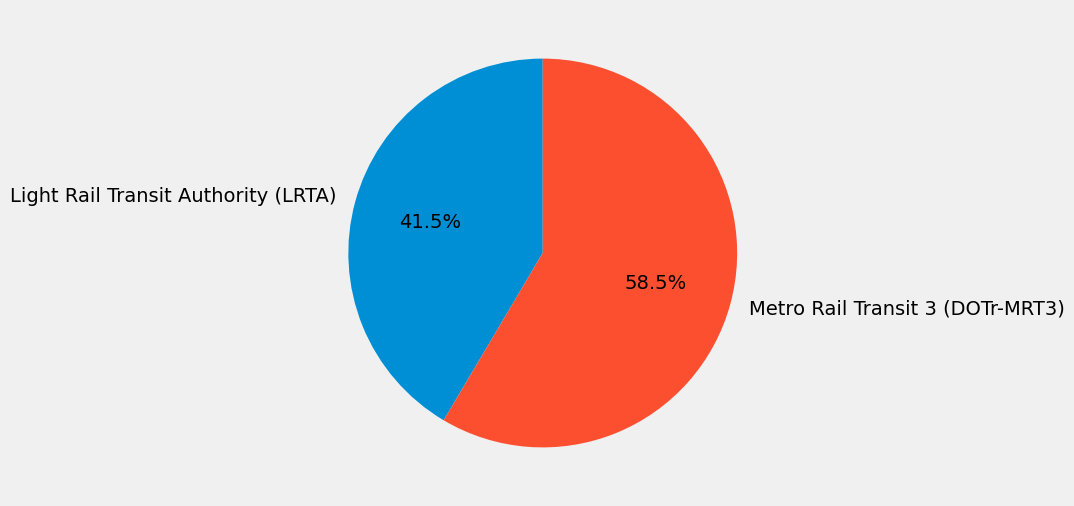

In [11]:
style.use("fivethirtyeight")
plot_univariate("Organization", "pie", 0)

Text(0.5, 1.0, 'Railway Workforce Percentage by Nature of Employment \n')

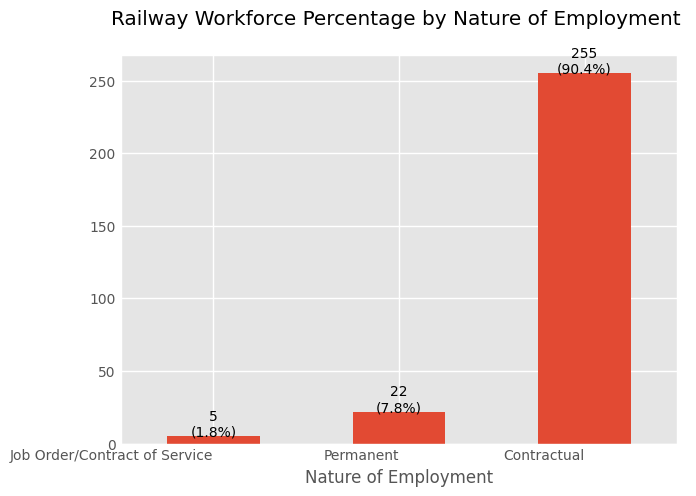

In [12]:
style.use("ggplot")
plot_univariate("NatureofEmployment", "bar", angle=0)
plt.xlabel("Nature of Employment")
plt.title("Railway Workforce Percentage by Nature of Employment \n")
# plt.ylabel("Population")

#**Bivariate Analysis**

### **Gender Distribution**

In [13]:
retention_df.columns

Index(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment', 'JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3'],
      dtype='object')

In [14]:
def plot_sex_distrib(feature, data=retention_df):
  gender_employment_nature = retention_df.groupby(["Sex", feature]).size().reset_index(name="Count")
  total_count = gender_employment_nature["Count"].sum()
  gender_employment_nature["Percentage"] = (gender_employment_nature["Count"] / total_count) * 100
  fig, ax = plt.subplots(figsize=(8, 6))
  sns.barplot(data=gender_employment_nature, x=feature, y="Count", hue="Sex", ax=ax)

  # place percentage per plot
  for p in ax.patches:
    height = p.get_height()
    if height == 0:
      return None
    else:
      ax.annotate(f"{height/total_count:.1%}",  # Convert to percentage format
                  (p.get_x() + p.get_width() / 2., height),  # Positioning
                  ha='center', va='bottom', fontsize=10, color='black')

Text(0, 0.5, 'Population')

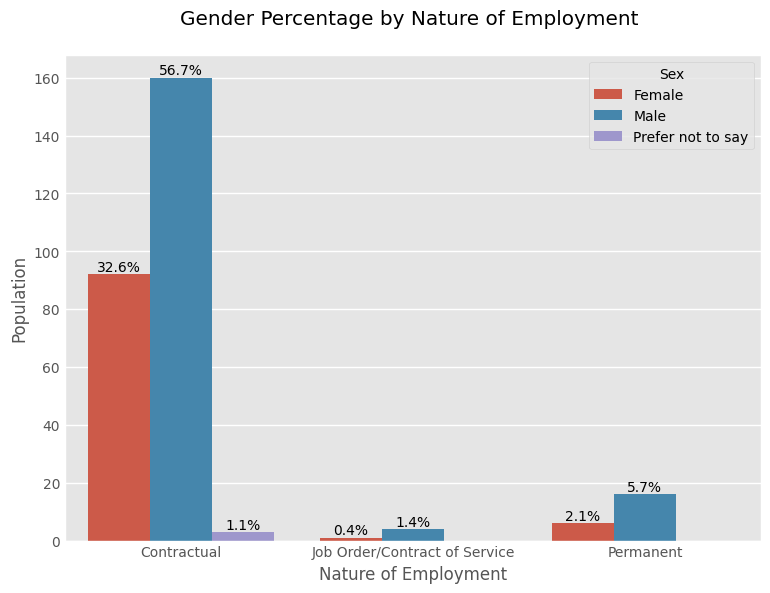

In [15]:
style.use("ggplot")
plot_sex_distrib("NatureofEmployment")
plt.title("Gender Percentage by Nature of Employment \n")
plt.xlabel("Nature of Employment")
plt.ylabel("Population")

Text(0, 0.5, 'Population')

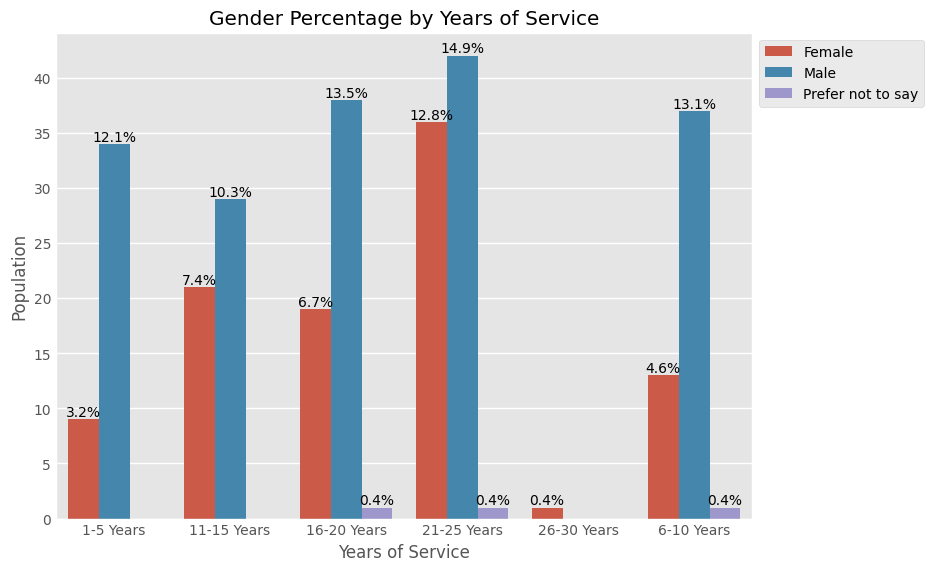

In [16]:
plot_sex_distrib("YearsofService")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Gender Percentage by Years of Service")
plt.xlabel("Years of Service")
plt.ylabel("Population")

In [17]:
retention_df.columns

Index(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment', 'JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3'],
      dtype='object')

In [18]:
def classify_job_level(position):

    if isinstance(position, str):
      position = position.lower()  # Convert to lowercase for case-insensitive matching
      if "supervisor" in position or " a" in position:
          return "Managerial"
      elif "senior" in position or "iii" in position or "3" in position or "stdo" in position or "b" in position:
          return "Senior"
      elif "c" in position:
          return "Junior"
      else:
          return "Junior"
    else:
      return "Unknown"

retention_df["Job Level"] = retention_df["Occupation"].apply(classify_job_level)

In [19]:
retention_df[["Occupation", "Job Level"]].sample(3)

,Occupation,Job Level
208,Station teller,Junior
134,Train Driver,Junior
123,Senior Transportation Development Officer,Senior


Text(0, 0.5, 'Population')

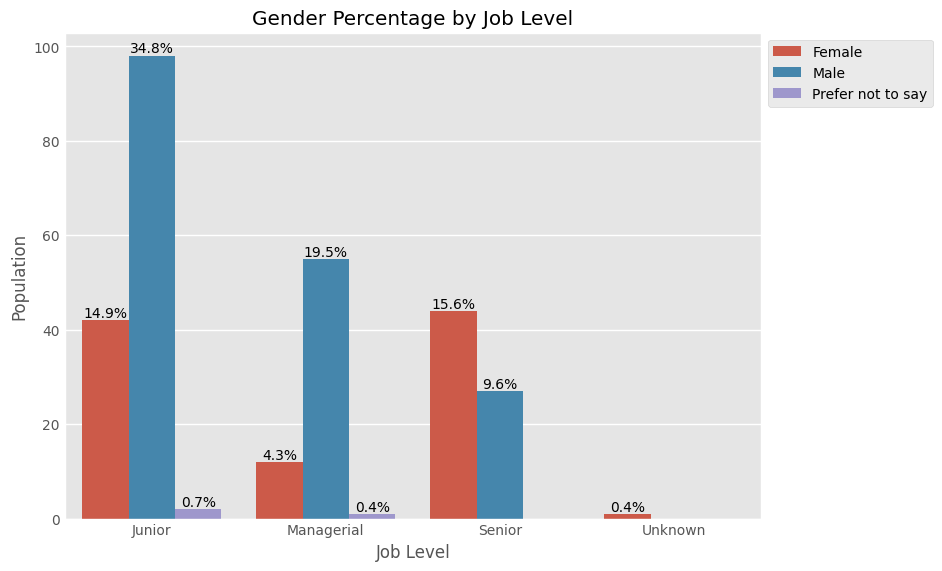

In [20]:
plot_sex_distrib("Job Level")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Gender Percentage by Job Level")
plt.xlabel("Job Level")
plt.ylabel("Population")

Text(0, 0.5, 'Population')

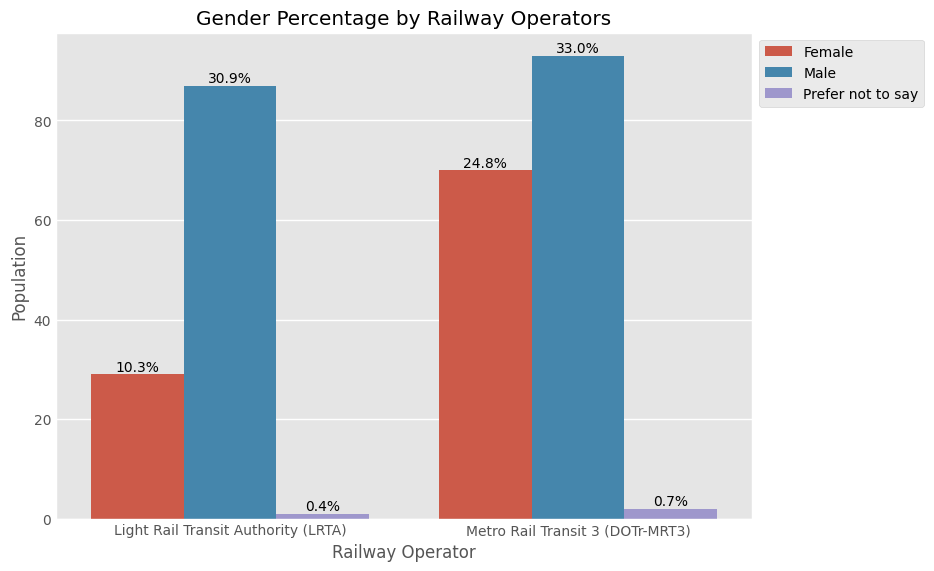

In [21]:
plot_sex_distrib("Organization")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Gender Percentage by Railway Operators")
plt.xlabel("Railway Operator")
plt.ylabel("Population")

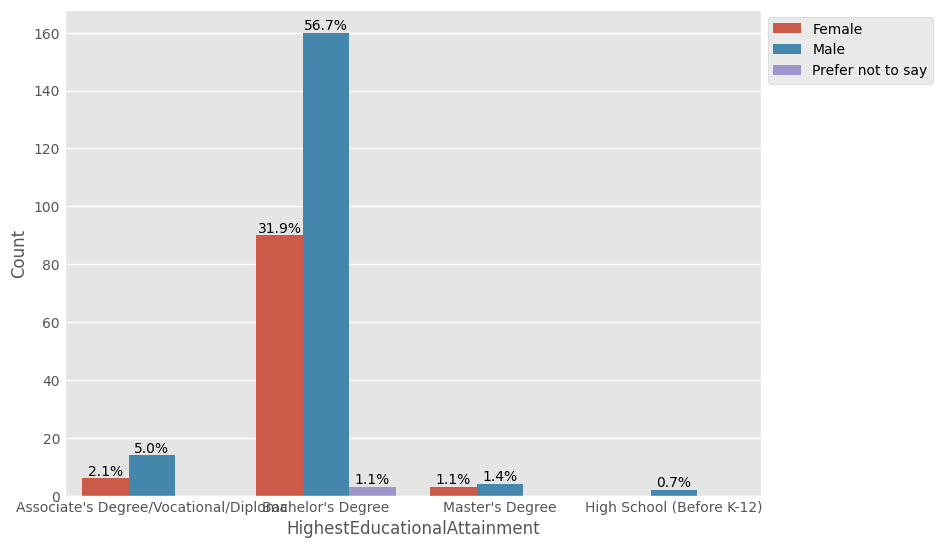

In [22]:
plot_sex_distrib("HighestEducationalAttainment")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

### **Education**

In [23]:
def plot_educ_distrib(feature, data=retention_df):
  gender_employment_nature = retention_df.groupby(["HighestEducationalAttainment", feature]).size().reset_index(name="Count")
  total_count = gender_employment_nature["Count"].sum()
  gender_employment_nature["Percentage"] = (gender_employment_nature["Count"] / total_count) * 100
  fig, ax = plt.subplots(figsize=(8, 6))
  sns.barplot(data=gender_employment_nature, x=feature, y="Count", hue="HighestEducationalAttainment", ax=ax)

  # place percentage per plot
  for p in ax.patches:
    height = p.get_height()
    if height == 0:
      return None
    else:
      ax.annotate(f"{height/total_count:.1%}",  # Convert to percentage format
                  (p.get_x() + p.get_width() / 2., height),  # Positioning
                  ha='center', va='bottom', fontsize=10, color='black')

In [24]:
retention_df.columns

Index(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment', 'JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3', 'Job Level'],
      dtype='object')

**Education vs Years of Service**

Text(0, 0.5, 'Population')

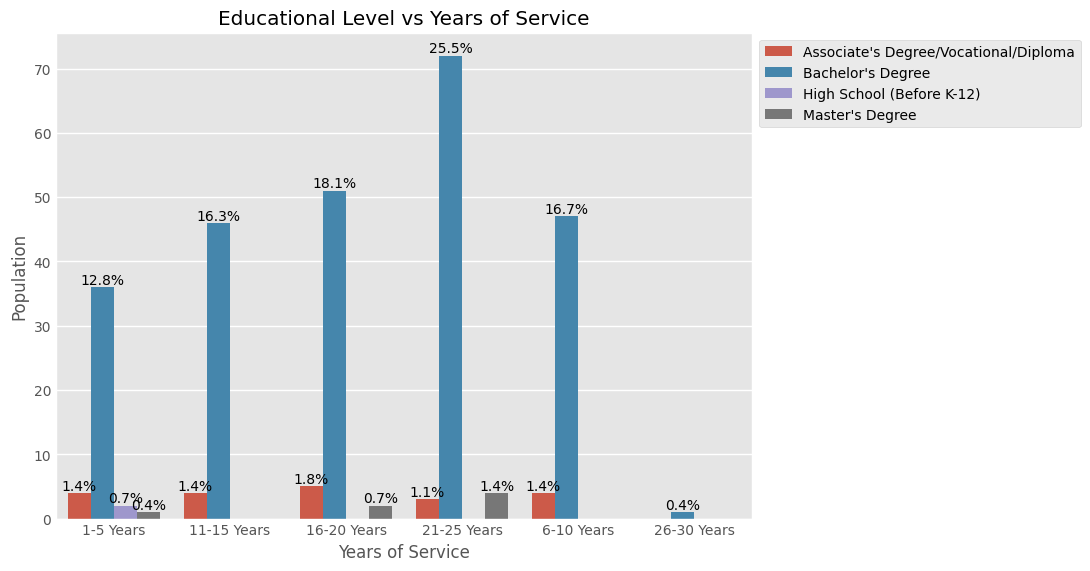

In [25]:
style.use("ggplot")
plot_educ_distrib("YearsofService")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Educational Level vs Years of Service")
plt.xlabel("Years of Service")
plt.ylabel("Population")

**Education vs Job Level**

Text(0, 0.5, 'Population')

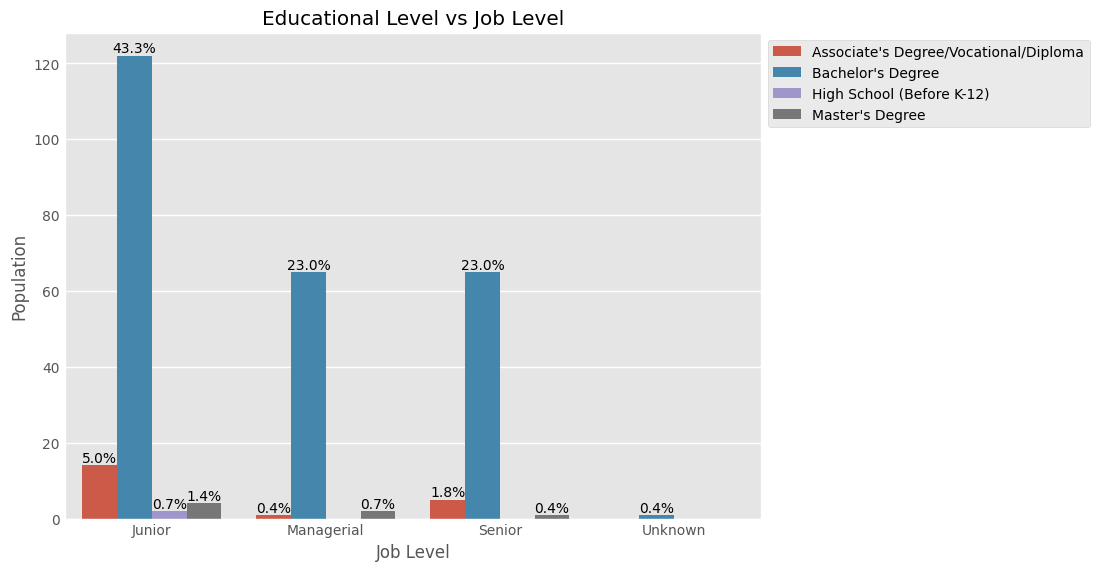

In [26]:
plot_educ_distrib("Job Level")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Educational Level vs Job Level")
plt.xlabel("Job Level")
plt.ylabel("Population")

**Education vs. Nature of Employment**

Text(0, 0.5, 'Population')

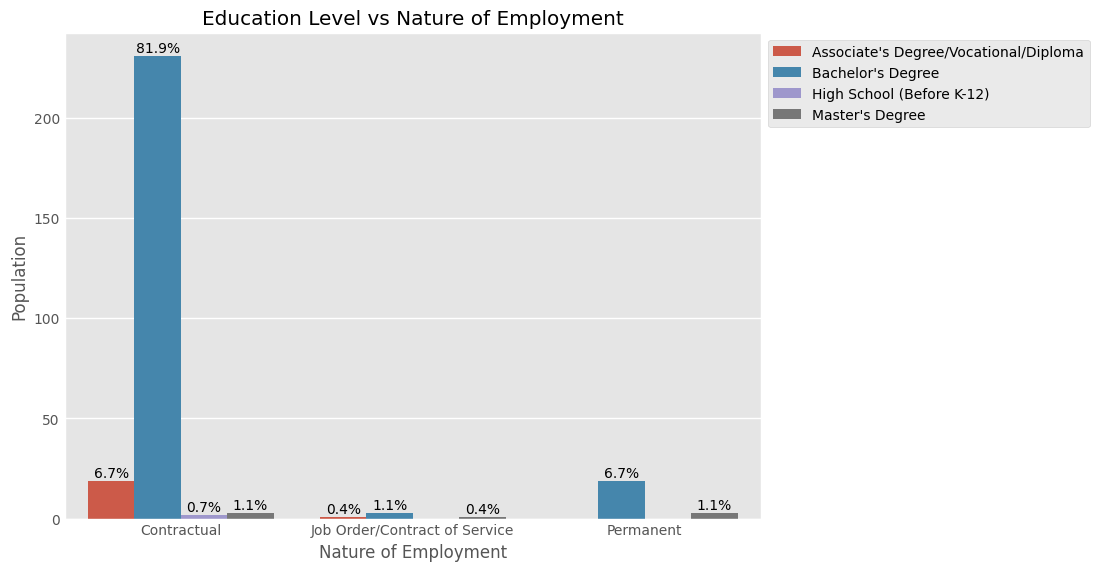

In [27]:
plot_educ_distrib("NatureofEmployment")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Education Level vs Nature of Employment")
plt.xlabel("Nature of Employment")
plt.ylabel("Population")

In [28]:
# --error

# **Multivariate Analysis**

<ipython-input-29-60760e4fcfc9>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  fig = sns.catplot(emp_educ_years,


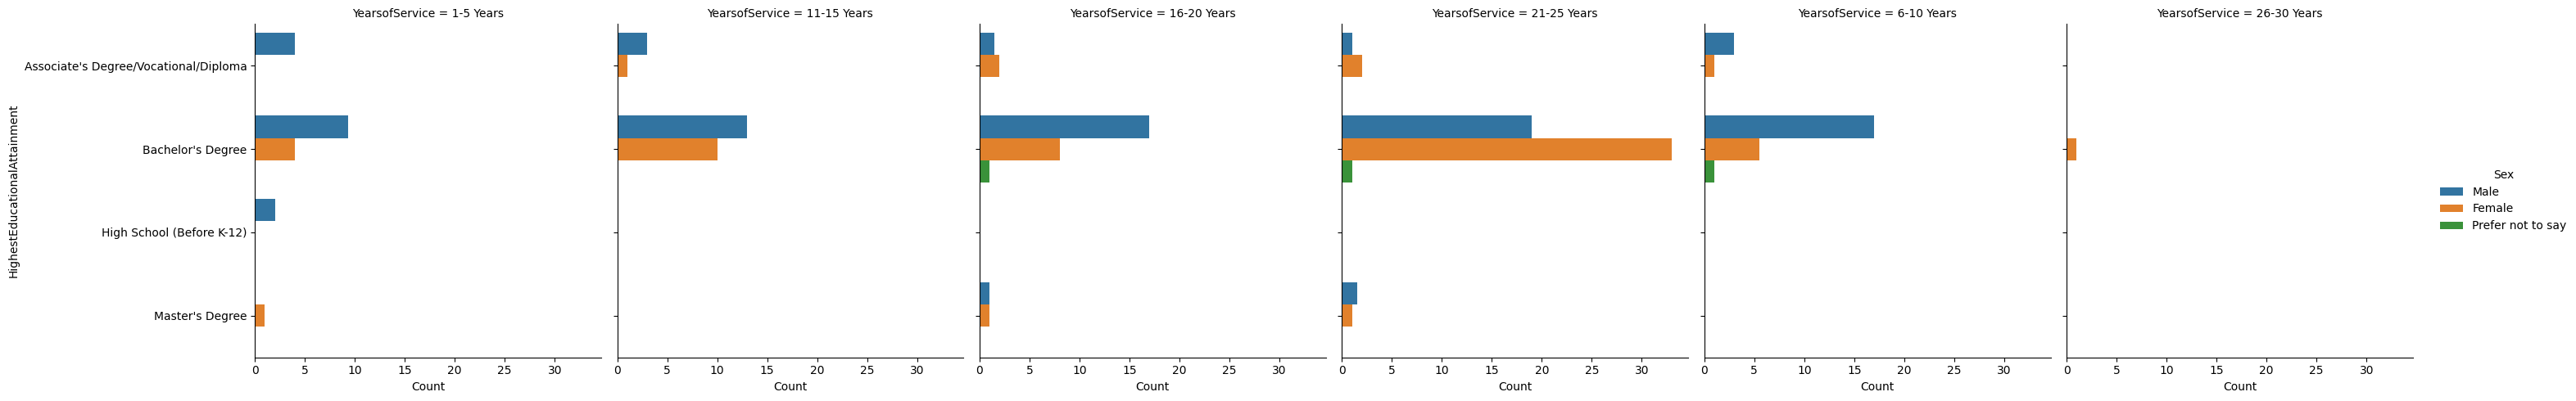

In [29]:
emp_educ_years = retention_df.groupby(["NatureofEmployment", "HighestEducationalAttainment", "YearsofService", "Sex"]).count()["Occupation"].reset_index()
emp_educ_years.rename(columns={"Occupation":"Count"}, inplace=True)
style.use("default")
fig = sns.catplot(emp_educ_years,
                  y="HighestEducationalAttainment",
                  col="YearsofService",
                  x="Count",
                  kind="bar",
                  # height=4, aspect=.8, col_wrap=8,
                  ci=False,
                  hue="Sex")

<ipython-input-30-b0c25963c089>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  fig = sns.catplot(emp_educ_years,


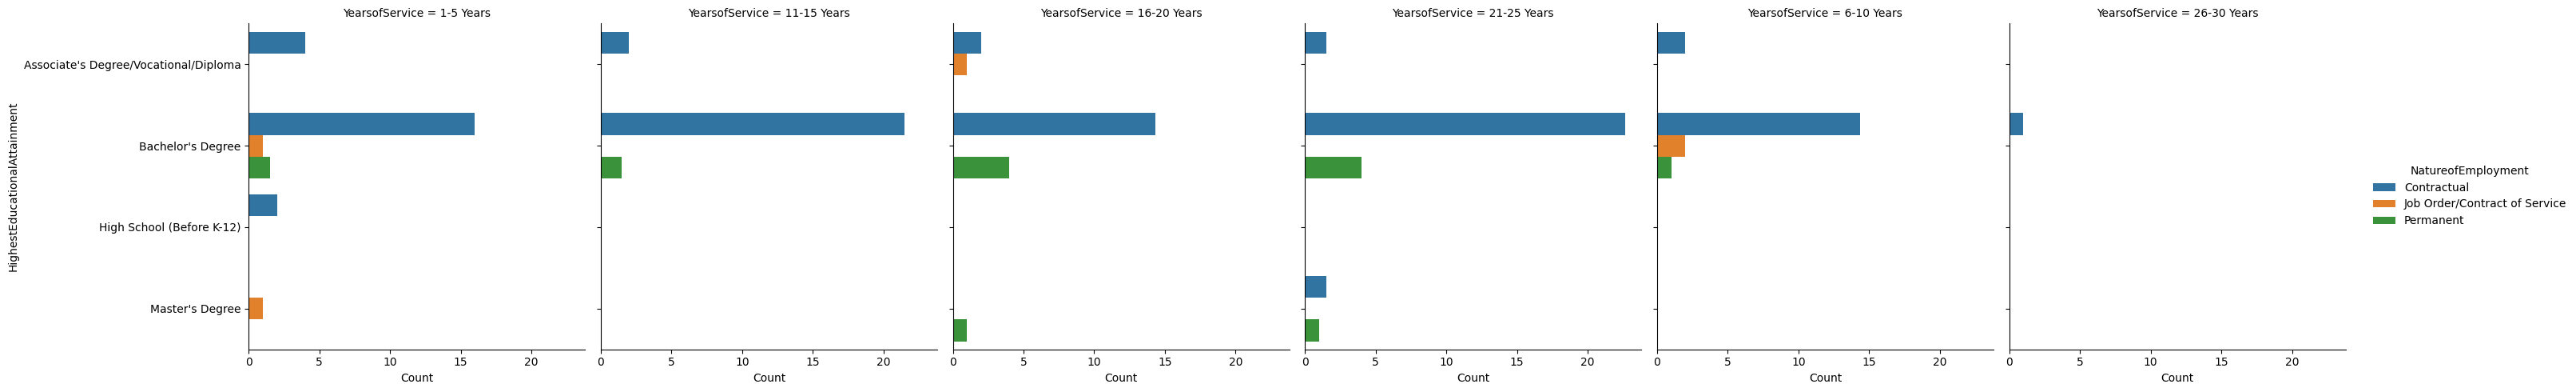

In [30]:
emp_educ_years = retention_df.groupby(["NatureofEmployment", "HighestEducationalAttainment", "YearsofService", "Sex"]).count()["Occupation"].reset_index()
emp_educ_years.rename(columns={"Occupation":"Count"}, inplace=True)
style.use("default")
fig = sns.catplot(emp_educ_years,
                  y="HighestEducationalAttainment",
                  col="YearsofService",
                  x="Count",
                  kind="bar",
                  ci=False,
                  # height=4, aspect=.8, col_wrap=8,
                  hue="NatureofEmployment")

# Insights


- **Education**: The majority (89.7%) of railway sector employees hold a Bachelor's degree, followed by those with vocational/associate degrees. Only 2.5% (7 personnel) have a Master’s degree.
- **Years of Service**: Over 80% of employees have been in service for 5 to 25 years, while only 0.4% have served for more than 26 years.
- **Employment Type**: A significant 90.4% of the workforce are contractual personnel, with only 7.8% (22 staff) holding permanent positions.

# **Feature Engineering**

In [31]:
def convert_scale(value):
  if (value == 5) or (value == 4):
    return 1
  # elif (value == 3):
  #   return 0
  elif (value == 3) or (value == 2) or (value == 1):
    return 0
  else:
    return 0

In [32]:
retention_df.columns

Index(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment', 'JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3', 'Job Level'],
      dtype='object')

In [184]:
retention_features = retention_df[['JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3']]

ret_feat_process = retention_features.applymap(convert_scale)
ret_feat_process.head()

<ipython-input-184-c101e02d3920>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ret_feat_process = retention_features.applymap(convert_scale)


,JF1,JF2,JL1,JL2,JS1,JS2,CF1,CF2,CL1,CL2,...,RM11,ITL1,ITS1,ITS2,ITS3,ITS4,ITL2,ITS5,ITS6,ITL3
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,0,1,1,0
2,1,1,0,1,1,1,0,0,0,0,...,1,1,1,1,1,0,0,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,1,0,0,1,1,0
4,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,0,1,1,0


In [202]:
ret_feat_process.shape

(282, 47)

In [204]:
retention_df.columns

Index(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment', 'JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3', 'Job Level'],
      dtype='object')

In [209]:
gender = pd.get_dummies(retention_df["Sex"])
age = pd.get_dummies(retention_df["Age"])
nature = pd.get_dummies(retention_df["NatureofEmployment"])
educ = pd.get_dummies(retention_df["HighestEducationalAttainment"])
years = pd.get_dummies(retention_df["YearsofService"])
joblvl = pd.get_dummies(retention_df["Job Level"])

In [210]:
new_ret_df = pd.concat([gender, age, nature, educ, years, joblvl, ret_feat_process], axis=1)
new_ret_df.head()

,Female,Male,Prefer not to say,21-25,26-30,31-35,36-40,41-45,46-50,51-55,...,RM11,ITL1,ITS1,ITS2,ITS3,ITS4,ITL2,ITS5,ITS6,ITL3
0,False,True,False,False,False,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,False,True,False,False,False,False,False,False,True,False,...,0,0,1,1,1,0,0,1,1,0
2,False,True,False,False,False,False,True,False,False,False,...,1,1,1,1,1,0,0,1,1,1
3,False,True,False,False,False,False,False,False,True,False,...,1,0,1,0,1,0,0,1,1,0
4,False,True,False,False,True,False,False,False,False,False,...,1,0,1,1,1,1,0,1,1,0


In [215]:
# import kmeans and dbscan
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
# Determine the optimal number of cluster using elbow method


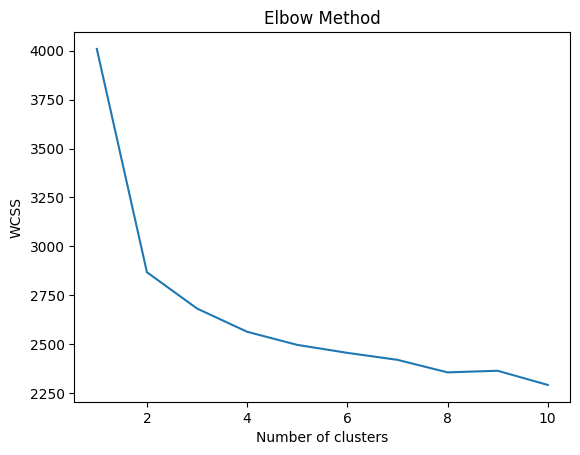

In [216]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(new_ret_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [219]:
# Fit kmeans
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(new_ret_df)
new_ret_df["kmeans_grp"] = y_kmeans

In [222]:
new_ret_df.columns

Index(['Female', 'Male', 'Prefer not to say', '21-25', '26-30', '31-35',
       '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', 'Contractual',
       'Job Order/Contract of Service', 'Permanent',
       'Associate's Degree/Vocational/Diploma', 'Bachelor's Degree',
       'High School (Before K-12)', 'Master's Degree', '1-5 Years',
       '11-15 Years', '16-20 Years', '21-25 Years', '26-30 Years',
       '6-10 Years', 'Junior', 'Managerial', 'Senior', 'Unknown', 'JF1', 'JF2',
       'JL1', 'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2',
       'ICP1', 'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5',
       'CT6', 'D1', 'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5',
       'RM6', 'RM7', 'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2',
       'ITS3', 'ITS4', 'ITL2', 'ITS5', 'ITS6', 'ITL3', 'kmeans_grp'],
      dtype='object')

In [225]:
retention_preprocess = pd.DataFrame({})
# Data Reduction
# Job Embeddedness Feat Engineering
retention_preprocess["JF"] = ret_feat_process["JF1"] + ret_feat_process["JF2"]
retention_preprocess["JL"] = ret_feat_process["JL1"] + ret_feat_process["JL2"]
retention_preprocess["JS"] = ret_feat_process["JS1"] + ret_feat_process["JS2"]
retention_preprocess["CF"] = ret_feat_process["CF1"] + ret_feat_process["CF2"]
retention_preprocess["CL"] = ret_feat_process["CL1"] + ret_feat_process["CL2"]
retention_preprocess["CS"] = ret_feat_process["CS1"] + ret_feat_process["CS2"]

# JE Class encoded
retention_preprocess['JE_dep'] = retention_preprocess[['JF', 'JL', 'JS', 'CF', 'CL', 'CS']].astype(str).apply(lambda x: ''.join(x), axis=1)

# JE Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
retention_new["JE_cat"] = le.fit_transform(retention_new["JE_dep"])
retention_new["JE_cat"].unique()

<ipython-input-225-755d888174a2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retention_new["JE_cat"] = le.fit_transform(retention_new["JE_dep"])


array([30, 29,  7, 21,  0, 18, 28,  5, 11,  2, 15, 17, 16, 20, 12, 22, 27,
       23, 25, 13, 14, 19, 26,  1,  4, 24,  8, 10,  6,  3,  9])

In [226]:
new_ret_df["JE_cat"] = retention_new["JE_cat"]

In [229]:
# !pip install pingouin

In [231]:
# chi-square test of independence between JE_cat and kmeans_grp using pingouin
# signifance or alpha = 0.05
import pingouin as pg
exp, obs, stats = pg.chi2_independence(new_ret_df, x='JE_cat', y='kmeans_grp')
print(stats[stats['test'] == 'pearson'])

      test  lambda        chi2   dof          pval    cramer  power
0  pearson     1.0  127.789675  30.0  4.920697e-14  0.673168    1.0


/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7991: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


1. Test (pearson):
The type of test conducted is Pearson’s Chi-Square test, which is standard for testing independence.

2. Lambda (1.0):
The value of lambda is typically associated with effect size or measures of association. In this case, it seems set to 1.0, possibly reflecting perfect association.

3. Chi2 (127.78975):
This is the Chi-Square test statistic. A higher value indicates that the observed and expected frequencies differ significantly.

4. DOF (30.0):
Degrees of Freedom, calculated as
(
rows
−
1
)
×
(
columns
−
1
)
(rows−1)×(columns−1), reflect the number of independent comparisons in the dataset.

5. pval (4.92e-14): This is the p-value. Since 𝑝 (0.05) p < 0.05, the result is statistically significant, meaning there is evidence to reject the null hypothesis (H₀). This suggests that the two variables are not independent and are associated.

5. Cramer (0.673168):
Cramér's V is a measure of the strength of association between two categorical variables:

- 0 to 0.1: Weak association
- 0.1 to 0.3: Moderate association

 Above 0.3: Strong association
Here, 0.673 indicates a strong association between the variables.
Power (1.0):
Statistical power represents the likelihood of detecting an effect if there is one. A value of 1.0 means the test had enough power to detect significant associations.

The variables in the analysis are strongly associated with each other (based on Cramér's V) and the relationship is statistically significant (
𝑝
<
0.05
p<0.05). This implies that the two variables are likely dependent.

Would you like help interpreting what this means in the context of your data?

# **Analyze the relation of talent management clusters to job embeddedness**

In [232]:
new_ret_df

,Female,Male,Prefer not to say,21-25,26-30,31-35,36-40,41-45,46-50,51-55,...,ITS1,ITS2,ITS3,ITS4,ITL2,ITS5,ITS6,ITL3,kmeans_grp,JE_cat
0,False,True,False,False,False,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,NaN
1,False,True,False,False,False,False,False,False,True,False,...,1,1,1,0,0,1,1,0,0,30.0
2,False,True,False,False,False,False,True,False,False,False,...,1,1,1,0,0,1,1,1,1,NaN
3,False,True,False,False,False,False,False,False,True,False,...,1,0,1,0,0,1,1,0,1,30.0
4,False,True,False,False,True,False,False,False,False,False,...,1,1,1,1,0,1,1,0,1,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,True,False,False,False,False,False,False,False,True,False,...,0,0,0,0,0,0,0,1,0,NaN
278,False,True,False,False,False,False,True,False,False,False,...,1,1,0,1,0,1,1,1,0,NaN
279,True,False,False,False,False,False,False,False,True,False,...,1,1,1,1,1,1,1,1,1,17.0
280,True,False,False,False,False,False,False,True,False,False,...,1,1,1,1,0,1,1,1,1,13.0


In [92]:
ret_feat_process[["JF1", "JF2"]].sample(5)

,JF1,JF2
211,0,0
120,1,1
262,0,0
270,1,1
114,0,1


In [174]:
ret_feat_process.columns

Index(['JF1', 'JF2', 'JL1', 'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2',
       'CS1', 'CS2', 'ICP1', 'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3',
       'CT4', 'CT5', 'CT6', 'D1', 'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3',
       'RM4', 'RM5', 'RM6', 'RM7', 'RM8', 'RM9', 'RM10', 'RM11', 'ITL1',
       'ITS1', 'ITS2', 'ITS3', 'ITS4', 'ITL2', 'ITS5', 'ITS6', 'ITL3'],
      dtype='object')

In [185]:
retention_preprocess = pd.DataFrame({})
# Data Reduction
# Job Embeddedness Feat Engineering
retention_preprocess["JF"] = ret_feat_process["JF1"] + ret_feat_process["JF2"]
retention_preprocess["JL"] = ret_feat_process["JL1"] + ret_feat_process["JL2"]
retention_preprocess["JS"] = ret_feat_process["JS1"] + ret_feat_process["JS2"]
retention_preprocess["CF"] = ret_feat_process["CF1"] + ret_feat_process["CF2"]
retention_preprocess["CL"] = ret_feat_process["CL1"] + ret_feat_process["CL2"]
retention_preprocess["CS"] = ret_feat_process["CS1"] + ret_feat_process["CS2"]

#
retention_preprocess['JE_dep'] = retention_preprocess[['JF', 'JL', 'JS', 'CF', 'CL', 'CS']].astype(str).apply(lambda x: ''.join(x), axis=1)

# Talent Management Feat Engineering
# retention_preprocess["ICP"] = ret_feat_process["ICP1"] + ret_feat_process["ICP2"] + ret_feat_process["ICP3"] + ret_feat_process["ICP4"]
# retention_preprocess["CT"] = ret_feat_process["CT1"] + ret_feat_process["CT2"] + ret_feat_process["CT3"] + ret_feat_process["CT4"] + ret_feat_process["CT5"] + ret_feat_process["CT6"]
# retention_preprocess["D"] = ret_feat_process["D1"] + ret_feat_process["D2"] + ret_feat_process["D3"] + ret_feat_process["D4"] + ret_feat_process["D5"]
# retention_preprocess["RM"] = ret_feat_process["RM1"] + ret_feat_process["RM2"] + ret_feat_process["RM3"] + ret_feat_process["RM4"] + ret_feat_process["RM5"] + ret_feat_process["RM6"] + ret_feat_process["RM7"] + ret_feat_process["RM8"] + ret_feat_process["RM9"] + ret_feat_process["RM10"] + ret_feat_process["RM11"]

retention_preprocess["ITS1"] = ret_feat_process["ITS1"]
retention_preprocess["ITL1"] = ret_feat_process["ITL1"]

In [186]:
sub_feat = ret_feat_process[['ICP1', 'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3','CT4', 'CT5', 'CT6', 'D1', 'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3','RM4', 'RM5', 'RM6', 'RM7', 'RM8', 'RM9', 'RM10', 'RM11',]]
retention_new = pd.concat([retention_preprocess, sub_feat], axis=1)
retention_new

,JF,JL,JS,CF,CL,CS,JE_dep,ITS1,ITL1,ICP1,...,RM2,RM3,RM4,RM5,RM6,RM7,RM8,RM9,RM10,RM11
0,1,0,0,0,0,1,100001,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,2,2,2,2,222222,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,2,0,0,1,212001,1,1,1,...,1,1,0,0,0,0,0,1,1,1
3,2,2,2,2,2,2,222222,1,0,1,...,1,1,1,1,1,1,1,1,1,1
4,2,2,2,2,2,1,222221,1,0,1,...,1,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0,0,1,2,2,2,001222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278,2,0,2,0,0,2,202002,1,0,1,...,0,0,0,1,1,0,0,1,0,1
279,2,1,2,2,2,2,212222,1,1,1,...,1,1,1,1,1,1,1,1,1,1
280,2,1,2,1,2,2,212122,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [187]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
retention_new["JE_cat"] = le.fit_transform(retention_new["JE_dep"])
retention_new["JE_cat"].unique()

array([ 17, 120,  83, 119,  79,  84,  20,  52,  59, 110, 108,  14,   0,
       102, 101, 117,  56,  30,  86,  16,   7,  94,  96,  95,  34, 109,
        90,  89, 111, 116,  87,  41, 112,  98,  18,  23, 114,  91,  65,
        93, 107,  80, 115,  64,  27,   4,  58,  28,  36,  70,  46, 113,
        31,   3,  25,   9,  40,  51,  50,  21,  68,  57,  47,  19,  37,
        24,  38,  39,  13,  92,  43,  45,  11,  77,  26,  55,  74,   1,
        53,  81,  75,  42,   6,  60,  54,  67,  49,  88, 106,  22, 118,
        76,  15,  73,  85,   5,  35,  44,  66, 103, 105,  48, 104,  61,
        78,  33,  97,  82,  72,  62,  69, 100,  71,  32,  29,  12,  99,
        10,   8,  63,   2])

In [190]:
# prompt: drop JE_cat value with only 1 entry in the whole dataset
# Assuming 'retention_df' is your DataFrame and it's already loaded.
# Assuming the code you provided is in a Jupyter Notebook cell or a Python script.

value_counts = retention_new['JE_cat'].value_counts()
to_drop = value_counts[value_counts == 1].index
retention_new = retention_new[~retention_new['JE_cat'].isin(to_drop)]

In [108]:
# retention_preprocess["JE_dep"].value_counts().plot(kind="bar", figsize=(15, 5))

# **Predictive Modeling Part 1**

In [196]:
# Import API for ML classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [191]:
# Define variables for stage 1
X = retention_new[['ICP1', 'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3','CT4', 'CT5', 'CT6', 'D1', 'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3','RM4', 'RM5', 'RM6', 'RM7', 'RM8', 'RM9', 'RM10', 'RM11','ITS1']]
y1 = retention_new["JE_cat"]

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, stratify=y1,random_state=42)

In [192]:
# Fit and predict Random Forest Classifier model
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_model.fit(X1_train, y1_train)
rfc_JE_pred = rfc_model.predict(X1_test)

In [193]:
# Fit and predict Bayesian Classifier model
gnb_model = GaussianNB()
gnb_model.fit(X1_train, y1_train)
gnb_JE_pred = gnb_model.predict(X1_test)

In [194]:
# Fit KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X1_train, y1_train)
knn_JE_pred = knn_model.predict(X1_test)

In [199]:
# Fit Logistic Regression
logreg_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
logreg_model.fit(X1_train, y1_train)
logreg_JE_pred = logreg_model.predict(X1_test)

In [200]:
# Fit and predict Gradient Boosted Classifier model
# xgb_model = XGBClassifier(n_estimators=100, random_state=42)
# xgb_model.fit(X1_train, y1_train)
# xgb_JE_pred = xgb_model.predict(X1_test)

In [201]:
from sklearn.metrics import accuracy_score, confusion_matrix
rfc_ac_score = accuracy_score(y1_test, rfc_JE_pred)
gnb_ac_score = accuracy_score(y1_test, gnb_JE_pred)
knn_ac_score = accuracy_score(y1_test, knn_JE_pred)
logreg_ac_score = accuracy_score(y1_test, logreg_JE_pred)
print("Accuracy Score")
print("Random Forest: ", rfc_ac_score)
print("Naive Bayes: ", gnb_ac_score)
print("KNN: ", knn_ac_score)
print("Logistic Regression: ", logreg_ac_score)

Accuracy Score
Random Forest:  0.28205128205128205
Naive Bayes:  0.07692307692307693
KNN:  0.3333333333333333
Logistic Regression:  0.3333333333333333


In [75]:
# Talent Management Variables
# X = ret_feat_process[['ICP1','ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1', 'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7','RM8', 'RM9', 'RM10', 'RM11']]
X = ret_feat_process[["RM7", "D2", "ICP1", "D3", "CT5", "CT3", "RM5", "ICP3", "RM6"]]

# Job Embeddedness Variables, which are the dependent variables for stage 1
y1 = ret_feat_process[['JF1', 'JF2', 'JL1','JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2']]

# Employee Retention Variables which are the dependent variables for stage 2
y2 = ret_feat_process[['ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4','ITL2', 'ITS5', 'ITS6', 'ITL3']]

In [76]:
X = retention_preprocess[["ICP", "RM", "D", "CT", "ITS1"]]
y1 = retention_preprocess[["JF", "JL1", "JS1", "CF1", "CL1", "CS1"]]
y2 = retention_preprocess["ITL1"]

In [134]:
retention_preprocess

,JF,JL,JS,CF,CL,CS,JE_dep,ICP,CT,D,RM,ITS1,ITL1,JE_cat
1,2,2,2,2,2,2,222222,0,0,0,0,1,0,120
3,2,2,2,2,2,2,222222,4,6,5,11,1,0,120
4,2,2,2,2,2,1,222221,4,6,5,10,1,0,119
5,2,2,2,2,2,2,222222,4,6,5,11,1,1,120
9,2,0,0,0,0,0,200000,3,4,1,4,0,0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2,2,2,2,2,2,222222,4,6,5,11,1,1,120
274,2,2,2,2,2,2,222222,4,6,5,11,1,1,120
276,0,0,0,0,0,0,000000,0,0,0,0,0,0,0
279,2,1,2,2,2,2,212222,4,6,5,11,1,1,96


### Stage 1: Random Forest

In [81]:
# Split the variables for stage 1
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

# Stage 1: Predict Job Embeddedness
model1 = MultiOutputRegressor(RandomForestClassifier(n_estimators=100, random_state=42))
model1.fit(X_train, y1_train)

# Predict the variables for stage 1
JE_pred = model1.predict(X_test)

### Stage 2: Random Forest

In [83]:
# Stage 2: Predict Employee Retention
X_stage2 = np.hstack((X_test, JE_pred))

# # Split y2 into training and testing sets to match X_stage2
y2_train, y2_test = train_test_split(y2, test_size=0.5, random_state=42)
model_stage2 = LogisticRegression(random_state=42)

# Fit the model
model_stage2.fit(X_stage2, y2_train)

# Predict Retention & Turnover
final_predictions = model_stage2.predict(X_stage2)

ValueError: Found input variables with inconsistent numbers of samples: [57, 141]

### Metric Evaluation

In [71]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2

y_actual_1 = y1_test.to_numpy()
y_preds_1 = JE_pred

y_actual_2 = y2_test.to_numpy()
y_preds_2 = final_predictions

# Stage 1
rmse_stg_1 = np.mean(mse(y_preds_1, y_actual_1))
mae_stg_1 = np.mean(mae(y_preds_1, y_actual_1))
r2_stg_1 = r2(y_preds_1, y_actual_1)

# Stage 2
rmse_stg_2 = np.mean(mse(y_preds_2, y_actual_2))
mae_stg_2 = np.mean(mae(y_preds_2, y_actual_2))
r2_stg_2 = r2(y_preds_2, y_actual_2)


rf_model = pd.DataFrame({
    "Stage": ["Stage 1", "Stage 2"],
    "RMSE": [rmse_stg_1, rmse_stg_2],
    "MAE": [mae_stg_1, mae_stg_2],
    "R2": [r2_stg_1, r2_stg_2]})

rf_model.set_index("Stage", inplace=True)

rf_model

,RMSE,MAE,R2
Stage,,,
Stage 1,0.951537,0.594563,-0.223849
Stage 2,0.489362,0.489362,-4.471879


# **XGBoost**

In [72]:
from xgboost import XGBRegressor, XGBClassifier

xgmodel = MultiOutputRegressor(XGBClassifier(n_estimators=100, random_state=42))
xgmodel.fit(X_train, y1_train)

# Stage 1
JE_xg_preds = xgmodel.predict(X_test)

In [73]:
# Stage 2
X_stage2_xg = np.hstack((X_test, JE_xg_preds))
xgmodel_stage2 = XGBClassifier(n_estimators=100, random_state=42)
xgmodel_stage2.fit(X_stage2_xg, y2_train)
final_xg_predictions = xgmodel_stage2.predict(X_stage2_xg)

In [74]:
# Evaluation

# stage 1
rmse_xg_stg_1 = np.mean(mse(JE_xg_preds, y_actual_1))
mae_xg_stg_1 = mae(JE_xg_preds, y_actual_1)
r2_xg_stg_1 = r2(JE_xg_preds, y_actual_1)

#stage 2
rmse_xg_stg_2 = np.mean(mse(final_xg_predictions, y_actual_2))
mae_xg_stg_2 = mae(final_xg_predictions, y_actual_2)
r2_xg_stg_2 = r2(final_xg_predictions, y_actual_2)

xg_model = pd.DataFrame({
    "Stage": ["Stage 1", "Stage 2"],
    "RMSE": [rmse_xg_stg_1, rmse_xg_stg_2],
    "MAE": [mae_xg_stg_1, mae_xg_stg_2],
    "R2": [r2_xg_stg_1, r2_xg_stg_2]})
xg_model.set_index("Stage", inplace=True)

xg_model

,RMSE,MAE,R2
Stage,,,
Stage 1,0.953901,0.611111,-0.270600
Stage 2,0.496454,0.496454,-1.660377


# **Feedback Process: Information Gain**

In [43]:
# !pip install tensorflow

In [44]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Input Layer
input_layer = Input(shape=(X.shape[1],))

# Stage 1: Job Embeddedness Prediction
je_layer = Dense(16, activation='relu')(input_layer)
je_output = Dense(1, name='job_embeddedness')(je_layer)

# Stage 2: Employee Retention & Turnover (Multi-Output)
concat_layer = Dense(16, activation='relu')(je_output)
retention_output = Dense(1, name='retention')(concat_layer)
turnover_output = Dense(1, name='turnover')(concat_layer)

# Define Model
model = Model(inputs=input_layer, outputs=[je_output, retention_output, turnover_output])
model.compile(optimizer='adam', loss='mse')

# Train Model
model.fit(X_train, [y1_train, y2_train], epochs=50, batch_size=8)

Epoch 1/50


ValueError: y_true and y_pred have different structures.
y_true: ('*', '*')
y_pred: ['*', '*', '*']


In [ ]:
X

In [ ]:
y1_train

In [ ]:
y2_train